In [8]:
from TweetDataProcessing.TweetDataReport import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from simpletransformers.language_representation import RepresentationModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import GlorotUniform, HeUniform
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
np.set_printoptions(precision=8, suppress=False)
import pickle
import metrics
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import os
import re

# from text_cleaner.Text_Cleaner import Text_Cleaner

In [9]:
# Check if TensorFlow is built with CUDA (GPU support)
print("Is TensorFlow built with CUDA (GPU support)?:", tf.test.is_built_with_cuda())

# Check if a GPU device is available for TensorFlow
gpu_devices = tf.config.list_physical_devices('GPU')
print("Available GPU devices:", gpu_devices)

Is TensorFlow built with CUDA (GPU support)?: True
Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# RUFF DATA

In [2]:
# Sandor_Data = pd.read_json('SandorData.json')
# Sandor_Data

In [3]:
# corpus2020 = pd.read_json('wildfire-AUS-CAL-COL.json').T
# corpus2020

In [10]:
with open('WF.pkl', 'rb') as file:
    WF = pickle.load(file)
WF

,id,text,relevance,reps
0,555811944004059136,jetlag remedy: <HASHTAG> yoganidra increases m...,0,"[[0.1558615, -0.22208409, 0.32405025, -0.12193..."
1,875785704600719360,"<USER> as radiohead said, gravity always wins",0,"[[0.5369296, -0.07404575, 0.32802135, 0.378893..."
2,145272321131814912,<NUMBER> weeks ago i had my oil changed right ...,0,"[[0.27319214, -0.10883481, 0.37960258, -0.1088..."
3,923060401096548352,<HASHTAG> bayarea <HASHTAG> restaurants join <...,1,"[[0.31468362, -0.015434795, 0.29338357, -0.391..."
4,413865285716688896,alex &amp; sierra  <REPEAT> tai  <REPEAT> go...,0,"[[0.05304604, -0.03956152, 0.43150967, -0.2160..."
...,...,...,...,...
6401,780945793968726016,<USER> me,0,"[[-0.17661855, -0.22707242, 0.53293943, -0.036..."
6402,218755783205208064,pretty amazing time-lapse video of the <HASHTA...,1,"[[0.069605365, 0.022888266, 0.10279484, 0.0452..."
6403,920970081479286784,"judging from his response to the wildfires, tr...",1,"[[0.36734098, -0.17313328, 0.2507872, 0.214488..."
6404,391812720107859968,news by bbc australia bush fires set to worsen...,1,"[[0.16103259, -0.05147232, 0.30514735, -0.1565..."


# Data

In [5]:
# pretrained_model = RepresentationModel(model_type="bert",model_name="bert-base-uncased",use_cuda=False) 
# sentence_vectors = pretrained_model.encode_sentences(ariss_data['text'], combine_strategy="mean")
# sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
# WF['reps']=pd.Series(sentence_vectors)
# WF.to_csv('WFtest.csv', index=False)

# WF = pd.read_json("wildfire-AUS-CAL-COL.json",orient="index")
# WF = WF.sample(frac = 1).reset_index(drop=True)
# WF

In [6]:
# pretrained_model = RepresentationModel(model_type="bert",model_name="bert-base-uncased",use_cuda=False) 
# sentence_vectors = pretrained_model.encode_sentences(Sandor_Data['text'], combine_strategy="mean")
# sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
# pandasseries = pd.Series(sentence_vectors)
# Sandor_Data['reps'] = pandasseries.copy()
# Sandor_Data

In [32]:
# with open('Sandor_Data.pkl', 'wb') as f:
#     pickle.dump(Sandor_Data, f)

In [8]:
# with open('WF.pkl', 'rb') as f:
#     WF = pickle.load(f)
# WF

In [11]:
print_tweet_report(WF)

,column_names,data_types,shape_len,unique_values
0,id,<class 'numpy.int64'>,(),6406
1,text,<class 'str'>,---,6406
2,relevance,<class 'numpy.int64'>,(),2
3,reps,<class 'numpy.ndarray'>,"(1, 768)",6406


In [12]:
check_relevance_balance(WF)

,relevance,count,balance
0,1,3220,50.27%
1,0,3186,49.73%


# Training

In [13]:
ITERATIONS = 1
EPOCHS = 300
LOSS = 'binary_crossentropy'
LEARNING_RATE = 0.000001
METRICS = ['acc', metrics.precision, metrics.recall, metrics.f1]
BATCH_SIZE = 32
TEST_SIZE = 0.3
RELOVIR = 1 #null

text = """
ITERATIONS = 2 
EPOCHS = 3 
LOSS = 'binary_crossentropy'
OPTIMIZER = Adam(learning_rate=0.000001)
METRICS = ['acc', metrics.precision, metrics.recall, metrics.f1]
BATCH_SIZE = 32
TEST_SIZE = 0.3
RELOVIR = 1 
"""

# print(matches)

# print(dirs)

# for dir in dirs:
#     if os.path.isdir(os.path.join(path, dir)):
#         print(dir)

Directory run00023 created!


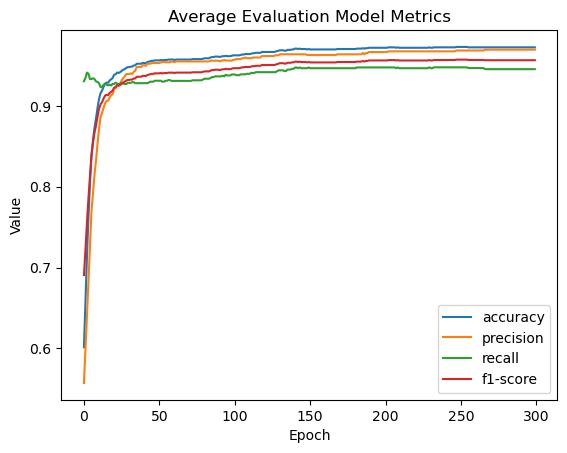

,train_loss,train_acc,train_prec,train_rec,train_f1,val_loss,val_acc,val_prec,val_rec,val_f1
0,0.687201,0.551139,0.532762,0.822487,0.641152,0.670981,0.601457,0.557311,0.930476,0.690664
1,0.669931,0.594908,0.564657,0.829949,0.666346,0.650653,0.657648,0.597488,0.934501,0.722022
2,0.647603,0.651407,0.606669,0.851340,0.703440,0.631224,0.714360,0.640249,0.941184,0.756203
3,0.628473,0.699866,0.647393,0.876971,0.739585,0.612753,0.762747,0.682738,0.939824,0.786349
4,0.609575,0.735150,0.679151,0.885419,0.763828,0.595000,0.803850,0.728132,0.933096,0.814062
...,...,...,...,...,...,...,...,...,...,...
295,0.067832,0.983251,0.986503,0.979727,0.982588,0.086818,0.972425,0.969597,0.945421,0.956511
296,0.068706,0.980125,0.984473,0.976283,0.979702,0.086730,0.972425,0.969597,0.945421,0.956511
297,0.069664,0.979678,0.984085,0.976143,0.979370,0.086738,0.972425,0.969597,0.945421,0.956511
298,0.068705,0.980572,0.983730,0.976117,0.979166,0.086565,0.972425,0.969597,0.945421,0.956511


In [16]:
av_loss_train = np.zeros(EPOCHS)
av_loss_val = np.zeros(EPOCHS)
av_acc_train = np.zeros(EPOCHS)
av_acc_val = np.zeros(EPOCHS)
av_prec_train = np.zeros(EPOCHS)
av_prec_val = np.zeros(EPOCHS)
av_rec_train = np.zeros(EPOCHS)
av_rec_val = np.zeros(EPOCHS)
av_f1_train = np.zeros(EPOCHS)
av_f1_val = np.zeros(EPOCHS)

iter_time = 0

for iteration in range(ITERATIONS):
    start_time = time.time()

    training_set_X, test_set_X, training_set_y, test_set_y = datasplit_new(WF,TEST_SIZE,relovir = RELOVIR)
    
    model = None
    
    #np.random.seed(SEED)
    
    #initializer choice
    
    model = Sequential()
    # (, 768)
    model.add(Input(shape = (768,))) 
    model.add(Dense(768,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=LEARNING_RATE), loss=LOSS, metrics=METRICS)
    
    # print(model.summary())
              
    clear_output(wait=True)
    print(f'iteration {iteration-1} took {iter_time} s or {iter_time/60} min')
    
    history = model.fit(training_set_X, training_set_y,validation_data=( test_set_X,  test_set_y), batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = 2,callbacks=[],shuffle = True)
    
    #training metrics
    av_loss_train = np.add(av_loss_train,np.array(history.history['loss']))
    av_acc_train = np.add(av_acc_train,np.array(history.history['acc']))
    av_prec_train = np.add(av_prec_train,np.array(history.history['precision']))
    av_rec_train = np.add(av_rec_train,np.array(history.history['recall']))
    av_f1_train = np.add(av_f1_train,np.array(history.history['f1']))
    #validation metrics
    av_loss_val = np.add(av_loss_val,np.array(history.history['val_loss']))
    av_acc_val = np.add(av_acc_val,np.array(history.history['val_acc']))
    av_prec_val = np.add(av_prec_val,np.array(history.history['val_precision']))
    av_rec_val = np.add(av_rec_val,np.array(history.history['val_recall']))
    av_f1_val = np.add(av_f1_val,np.array(history.history['val_f1']))
    
    end_time = time.time()
    
    iter_time = end_time-start_time
    
    
av_loss_train = np.divide(av_loss_train,ITERATIONS)
av_acc_train = np.divide(av_acc_train,ITERATIONS)
av_prec_train = np.divide(av_prec_train,ITERATIONS)
av_rec_train = np.divide(av_rec_train,ITERATIONS)
av_f1_train = np.divide(av_f1_train,ITERATIONS)

av_loss_val = np.divide(av_loss_val,ITERATIONS)
av_acc_val = np.divide(av_acc_val,ITERATIONS)
av_prec_val = np.divide(av_prec_val,ITERATIONS)
av_rec_val = np.divide(av_rec_val,ITERATIONS)
av_f1_val = np.divide(av_f1_val,ITERATIONS)

clear_output(wait=True)

results = pd.DataFrame({'train_loss': av_loss_train,'train_acc': av_acc_train,'train_prec': av_prec_train,'train_rec': av_rec_train,'train_f1': av_f1_train,
                        'val_loss': av_loss_val,'val_acc': av_acc_val,'val_prec': av_prec_val,'val_rec': av_rec_val,'val_f1': av_f1_val})


#####################
# saving everything at a new file with a run id(initially just run 001 ect) at the file run
# first create a folder checking the name
path = "C:/Users/distef/Neural_Networks/Silvanus-Treeads-WFdataset/runs"
dirs = os.listdir(path)
dirs.sort(reverse = True)
the_run = dirs[0]
match = re.search(r"run\d{5}", the_run)[0][3:]
match = f'{(int(match)+1):05}'
the_folder = f"run{match}"
directory = os.path.join(path, the_folder)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory {the_folder} created!")
else:
    print("Directory already exists.")
#####################
#savingmodel
#####################
# now save the results pickle and the hyperparameter text in the correct run folder
filepath = f"C:/Users/distef/Neural_Networks/Silvanus-Treeads-WFdataset/runs" +f"/{the_folder}"
sub_dir1 = os.path.join(filepath,'results.plk')
sub_dir2 = os.path.join(filepath,"hyperparameters.txt")
with open(sub_dir1, 'wb') as dummy:
    pickle.dump(results, dummy)
with open(sub_dir2, "wb") as dummy:
    dummy.write(text.encode())

#####################
# now save the plot pictures(not particularly usefull in the general code)
plt.plot(results['val_acc'])
plt.plot(results['val_prec'])
plt.plot(results['val_rec'])
plt.plot(results['val_f1'])
plt.title('Average Evaluation Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['accuracy','precision','recall','f1-score'], loc='lower right')#, bbox_to_anchor=(1, 0.5))
plt.savefig(f'runs/{the_folder}/AEMM.jpg',dpi = 300)
plt.show()

results

In [18]:
# model.save('English_Classifier')


In [19]:
# pretrained_model = RepresentationModel(model_type="bert",model_name="bert-base-uncased",use_cuda=False) 
# sentence_vectors = pretrained_model.encode_sentences(ariss_data['text'], combine_strategy="mean")
# sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
# WF['reps']=pd.Series(sentence_vectors)
# WF.to_csv('WFtest.csv', index=False)

# WF = pd.read_json("wildfire-AUS-CAL-COL.json",orient="index")
# WF = WF.sample(frac = 1).reset_index(drop=True)


,id,text,relevance,reps
0,555811944004059136,jetlag remedy: <HASHTAG> yoganidra increases m...,0,"[[0.1558615, -0.22208409, 0.32405025, -0.12193..."
1,875785704600719360,"<USER> as radiohead said, gravity always wins",0,"[[0.5369296, -0.07404575, 0.32802135, 0.378893..."
2,145272321131814912,<NUMBER> weeks ago i had my oil changed right ...,0,"[[0.27319214, -0.10883481, 0.37960258, -0.1088..."
3,923060401096548352,<HASHTAG> bayarea <HASHTAG> restaurants join <...,1,"[[0.31468362, -0.015434795, 0.29338357, -0.391..."
4,413865285716688896,alex &amp; sierra  <REPEAT> tai  <REPEAT> go...,0,"[[0.05304604, -0.03956152, 0.43150967, -0.2160..."
...,...,...,...,...
6401,780945793968726016,<USER> me,0,"[[-0.17661855, -0.22707242, 0.53293943, -0.036..."
6402,218755783205208064,pretty amazing time-lapse video of the <HASHTA...,1,"[[0.069605365, 0.022888266, 0.10279484, 0.0452..."
6403,920970081479286784,"judging from his response to the wildfires, tr...",1,"[[0.36734098, -0.17313328, 0.2507872, 0.214488..."
6404,391812720107859968,news by bbc australia bush fires set to worsen...,1,"[[0.16103259, -0.05147232, 0.30514735, -0.1565..."


In [40]:
pretrained_model = RepresentationModel(model_type="bert",model_name="bert-base-uncased",use_cuda=False) 
sentence_vectors = pretrained_model.encode_sentences(['Arson the rapper is crazy good'], combine_strategy="mean")

In [37]:
vector = WF['reps'][3]
vector.shape

(1, 768)

In [41]:
model.predict(sentence_vectors)

1/1 [==============================] - 0s 18ms/step


array([[0.00518599]], dtype=float32)

In [14]:
# with open('results.pkl', 'wb') as dummyvar:
#     pickle.dump(results, dummyvar)

In [15]:
# with open('results.pkl', 'rb') as f:
#     results = pickle.load(f)

# First Run 100iter-10epochs

In [16]:
# plt.plot(results['val_loss'])
#first run



# plt.plot(results['val_acc'])
# plt.plot(results['val_prec'])
# plt.plot(results['val_rec'])
# plt.plot(results['val_f1'])
# plt.title('Evaluation Model Metrics')
# plt.ylabel('Value')
# plt.xlabel('Epoch')
# plt.legend(['accuracy','precision','recall','f1-score'], loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# Second Run 100iter-10epochs

In [17]:
# plt.plot(results['val_acc'])
# plt.plot(results['val_prec'])
# plt.plot(results['val_rec'])
# plt.plot(results['val_f1'])
# plt.title('Evaluation Model Metrics')
# plt.ylabel('Value')
# plt.xlabel('Epoch')
# plt.legend(['accuracy','precision','recall','f1-score'], loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# third run 300 iters-10 epochs

In [18]:
# plt.plot(results['val_acc'])
# plt.plot(results['val_prec'])
# plt.plot(results['val_rec'])
# plt.plot(results['val_f1'])
# plt.title('Evaluation Model Metrics')
# plt.ylabel('Value')
# plt.xlabel('Epoch')
# plt.legend(['accuracy','precision','recall','f1-score'], loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# forth run 300 iters-10 epochs

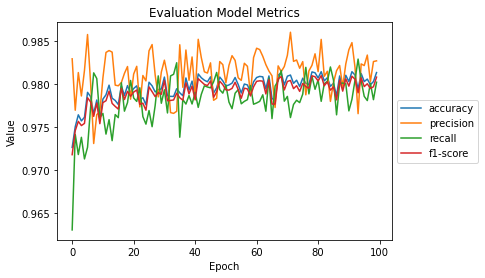

In [22]:
plt.plot(results['val_acc'])
plt.plot(results['val_prec'])
plt.plot(results['val_rec'])
plt.plot(results['val_f1'])
plt.title('Evaluation Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['accuracy','precision','recall','f1-score'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# forth run 1 iters-100 epochs